In [210]:
from semantic_comms import calculate_psnr, train_semantic_communication_system, load_images, add_awgn_noise
import torch
import numpy as np
from semantic_models.sc1 import SemanticEncoder, SemanticDecoder
from semantic_models.sc2 import SemanticEncoder2, SemanticDecoder2
from semantic_models.tc import SemanticEncoderTC, SemanticDecoderTC
import matplotlib.pyplot as plt

In [211]:
np.random.seed(42)
original_image = load_images("/home/zhang/Projects/GitHub/sam-semantic-communication/output/original")
# Images
images = load_images("output/masks")
num_images = images.size(0)
image_channels = images.size(1)
image_height = images.size(2)
image_width = images.size(3)

# Reshape images tensor to fit the semantic encoder input shape
images = images.view(num_images, image_channels, image_height, image_width)

# Set the desired SNR and number of training epochs
snr = 12  # dB
num_epochs = 2500

# Train the semantic communication system
encoder_model = SemanticEncoder()
decoder_model = SemanticDecoder()

# encoder_model = SemanticEncoder2()
# decoder_model = SemanticDecoder2()

# encoder_model = SemanticEncoderTC()
# decoder_model = SemanticDecoderTC()

In [212]:
encoder, decoder = train_semantic_communication_system(encoder_model, decoder_model, images, original_image, snr, num_epochs)

Epoch: 10/2500, Loss: 0.42340654134750366
Epoch: 20/2500, Loss: 0.2901940643787384
Epoch: 30/2500, Loss: 0.19839061796665192
Epoch: 40/2500, Loss: 0.1307227909564972
Epoch: 50/2500, Loss: 0.08353480696678162
Epoch: 60/2500, Loss: 0.05142055079340935
Epoch: 70/2500, Loss: 0.030790621414780617
Epoch: 80/2500, Loss: 0.01815921440720558
Epoch: 90/2500, Loss: 0.01083074789494276
Epoch: 100/2500, Loss: 0.0068128714337944984
Epoch: 110/2500, Loss: 0.0047218394465744495
Epoch: 120/2500, Loss: 0.0036503979936242104
Epoch: 130/2500, Loss: 0.0030799524392932653
Epoch: 140/2500, Loss: 0.002743948483839631
Epoch: 150/2500, Loss: 0.0025073394645005465
Epoch: 160/2500, Loss: 0.002317245351150632
Epoch: 170/2500, Loss: 0.0021458198316395283
Epoch: 180/2500, Loss: 0.0019867168739438057
Epoch: 190/2500, Loss: 0.0018364526331424713
Epoch: 200/2500, Loss: 0.001691612764261663
Epoch: 210/2500, Loss: 0.0015597074525430799
Epoch: 220/2500, Loss: 0.001441585598513484
Epoch: 230/2500, Loss: 0.00134685134980827

In [215]:

snr = 12  # dB

# Calculate SNR
encoder_images = encoder(images)
encoder_images = add_awgn_noise(encoder_images, snr)
restored_images = decoder(encoder_images)
restored_im = restored_images.sum(dim=0).unsqueeze(0)
theta = 1.0

psnr = calculate_psnr(images, restored_images, restored_images, theta)


print(images.shape)
print(encoder_images.shape)
print(restored_images.shape)
print(f"PSNR over AWGN channel: {psnr.item()} dB")

torch.Size([5, 3, 32, 32])
torch.Size([5, 32, 8, 8])
torch.Size([5, 3, 32, 32])
PSNR over AWGN channel: 28.7653751373291 dB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Restored image')

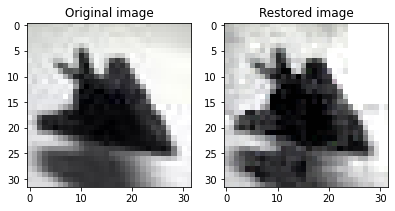

In [216]:
#plotting
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
im = original_image.squeeze(0).permute(1, 2, 0).numpy()
plt.imshow(im)
plt.title("Original image")
plt.subplot(1, 3, 2)
im_r = restored_im.squeeze(0).permute(1, 2, 0).detach().numpy()
plt.imshow(im_r)
plt.title("Restored image")

In [207]:
from compressai.zoo import cheng2020_anchor, bmshj2018_factorized

model = bmshj2018_factorized(quality=1, pretrained=True).eval()

#download a sample image
import imageio
from skimage.transform import resize
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import requests
#download a sample image
image = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg")
image = resize(image, (256, 256), anti_aliasing=True)

#convert to tensor
image = torch.from_numpy(image).permute(2, 0, 1).float().unsqueeze(0)

#compress and decompress
compressed_image = model.compress(image)

#decompress
reconstructed_image = model.decompress(compressed_image["strings"], compressed_image["shape"])

In [208]:
len(compressed_image['strings'][0][0])

908

29.666370840773602


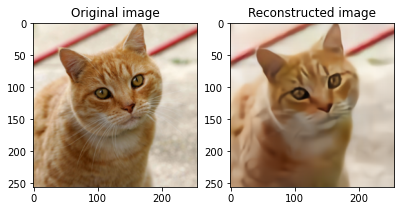

In [209]:
#display results
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(0).permute(1, 2, 0).numpy())
plt.title("Original image")
plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image["x_hat"].squeeze(0).permute(1, 2, 0).detach().numpy())
plt.title("Reconstructed image") 
print(psnr(image.squeeze(0).permute(1, 2, 0).numpy(), reconstructed_image["x_hat"].squeeze(0).permute(1, 2, 0).detach().numpy()))

In [176]:
x = torch.rand( 3, 256, 256)

In [180]:
from compressai import entropy_models

In [190]:
entropy_models.EntropyModel.decompress(compressed_image["strings"],compressed_image["shape"])

TypeError: decompress() missing 1 required positional argument: 'indexes'

In [188]:
compressed_image["strings"]

[[b'\x99 \xbb\xc7\n\x00\x00\x00\x9e\x13\x10Sf<m\x13\x17\xe4\\\xca\xcb\xba\xc3=\xa21\xda\x15\x82\xc3\x1b\xc1\xbf\x8d\x9b\'\x16\xce\x82e\x84S1\x96\xc0\xa4\xea\x07\x97\xed\x11\x15\x92\x93m\xb6OG\x86\xe0>)|I\x97\xeeO\xaa\x17CS\x19(]*A\xf1| [4\xf78\xd4\xa1\x08P\\\xa3_\xef\xe6\xc0\xd1\xfa\xf0\x1a\'\xa7V\x0f\xd7:\'\xfe^F\xfa\xdb\x88\x03\x90\xbb\xd2\xcaU\xcb\xf7*W\x1a5:\xeff\xc4\xd4\xfdX\xd7\xad\xf0\xc6\xc3\xfes";/\x85.\x9f\xe6E\xcc2\x04\xf6\xab\xd9\x89\xea\xb7\xbd[\x8dpm\x8b\xc0A\r\xc4S\xf8\x96NA\x15\xc1d\x7f\xac\r\x10\xa09\xc8\xbc\x01\x1a0\xc7\x18\xff\xec\x14\x07\r\xc1\\j\x9f\xec\xa6\xe4\xf9\x83\xa1\xf0\xcd\xc3\xbf\x19\xa6\xd4\xbbn\xe2h\xc0N\xe1\x17#\x86?Q\xd7\xa4\xf5\x0c;a\x92\xac\xe3Xie\xf6\x07\xdbOa\xbbRt\xba\x19\xa5`\x1c\x8d\xb5\x12\x0c\x06\xff\x93\xc0\xc2\x96l\xbf\xc9\xa6\x1dgE\xba\xc7\x07\xd4]\x93\x08fs\x12\xc1\xb4 \xc86d`\xc8\x91R\xb8\xfe\x06\xc7\xc0\xf3F\x91\xe9\x1e\xab\x84t\xc9N\xe0\xb1\xeaB]N\x8e\xd0\xddv<\x1b\xff\xbeX\xe6\x03\xf9\xa7-\xd1\xce\xf3\xf2\x82\xebf7\xad\xa47\x123G\x95\x